# Stock_Plot Analysis Program

By Yijing Xiao   

Reference Examples: [Example1](https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/)      [Example2](http://matplotlib.org/examples/pylab_examples/finance_demo.html)

### This program reads stock data from "downloads stocks" folder, handle the data with python libraries and make plots to get a better visualization of the stock

In [1]:
# Import all libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import datetime
from dateutil.relativedelta import relativedelta
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read stock data from file, stock number can be changed
stock = json.load(open("./download stocks/002241.json", "r"))

# Find the corresponding prices in the .json file data
price_open = stock["chart"]["result"][0]["indicators"]["quote"][0]["open"]
price_close = stock["chart"]["result"][0]["indicators"]["quote"][0]["close"]
price_high = stock["chart"]["result"][0]["indicators"]["quote"][0]["high"]
price_low = stock["chart"]["result"][0]["indicators"]["quote"][0]["low"]
volume = stock["chart"]["result"][0]["indicators"]["quote"][0]["volume"]
price_adjclose = stock["chart"]["result"][0]["indicators"]["adjclose"][0]["adjclose"]

# Change timestamp into string dates
ts = [ datetime.datetime.fromtimestamp(int(ts+86400)).strftime('%Y-%m-%d') for ts in stock["chart"]["result"][0]["timestamp"]]

In [3]:
# Preset the plot size
pylab.rcParams['figure.figsize'] = (15, 9)

### Plot Ajusted Closing Price History Curve

In [4]:
# Creat first Dataframe to include all the information read from .json file
df1 = pd.DataFrame([ts, price_open, price_close, price_high, price_low, volume, price_adjclose], index=["Date", "Open", "Close", "High", "Low", "Volume", "Adjclose"]).T
df1 = df1.set_index("Date")
df1.index = pd.to_datetime(df1.index)

# Drop lines that are all "None" object
df1 = df1.dropna(axis=0, how='all')

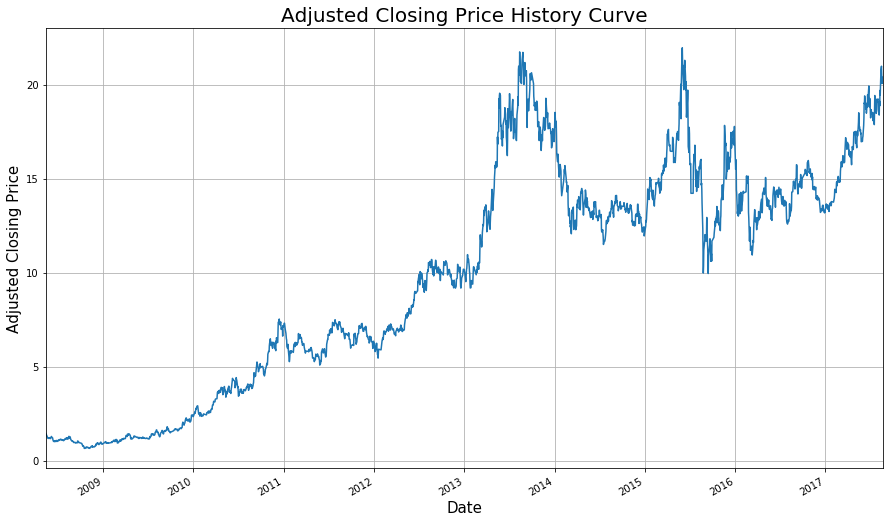

In [5]:
# Plot history price curve for Ajusted Closing Price
ax = df1["Adjclose"].plot(grid = True)
ax.set_xlabel("Date", fontsize = 15)
ax.set_ylabel("Adjusted Closing Price", fontsize = 15)
ax.set_title("Adjusted Closing Price History Curve", fontsize = 20)

### Make Candlestick Plot

In [6]:
# Create Dataframe for data between Jun 26th and Aug 22nd
# Getting ready for Candlestick Plot
df2 = df1.loc['20170626':'20170822']

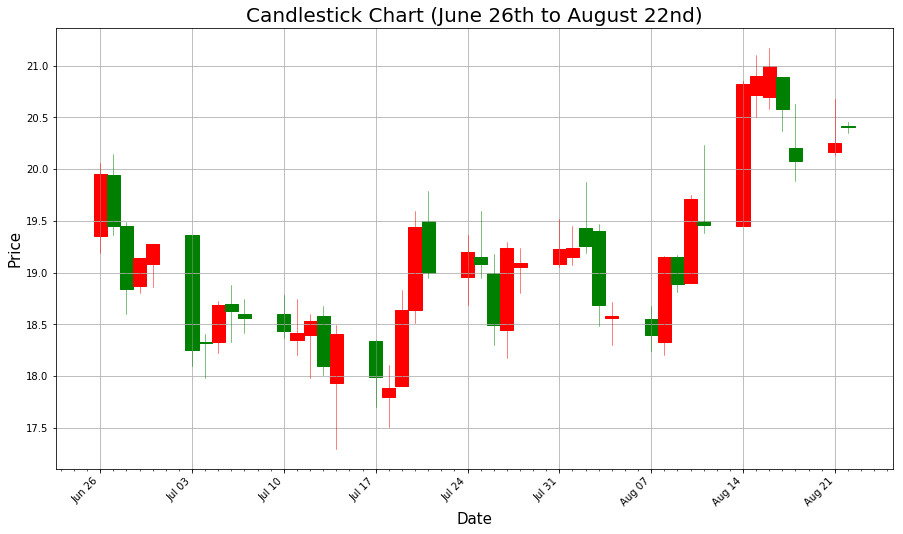

In [7]:
# Create a new DataFrame which includes stock data for each day shown on each candle stick
plotdata = df2.loc[:,["Open", "High", "Low", "Close"]]
stick = 1 # Candle stick width
 
# Set plot parameters
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
mondays = WeekdayLocator(MONDAY)        # major ticks
alldays = DayLocator()              # minor ticks
weekFormatter = DateFormatter('%b %d')  # date format
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
 
# Create the candelstick chart, Gain shown in red, Loss shown in green
candlestick_ohlc(ax, list(zip(list(date2num(plotdata.index.tolist())), 
                plotdata["Open"].tolist(), plotdata["High"].tolist(),
                plotdata["Low"].tolist(), plotdata["Close"].tolist())),
                colorup = "red", colordown = "green", width = stick)

# Adjust plot characteristic parameters
ax.grid(True)
ax.xaxis_date()
ax.autoscale_view()
ax.set_xlabel("Date", fontsize = 15)
ax.set_ylabel("Price", fontsize = 15)
ax.set_title("Candlestick Chart (June 26th to August 22nd)", fontsize = 20)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### Plot Stock Return (Ratio btwn Price of the day and Price at beginning of year)

In [8]:
# Creat Dataframe with just adjusted closing price and date
df3 = pd.DataFrame([ts, price_adjclose], index=["Date", "Adjclose"]).T
df3 = df3.set_index("Date")
df3.index = pd.to_datetime(df3.index)

# Drop lines with "None" values
df3 = df3.dropna(axis=0, how='all')

# Create a new Dataframe to get all the year to date data
Df3 = df3.loc['20170101':'20171231']

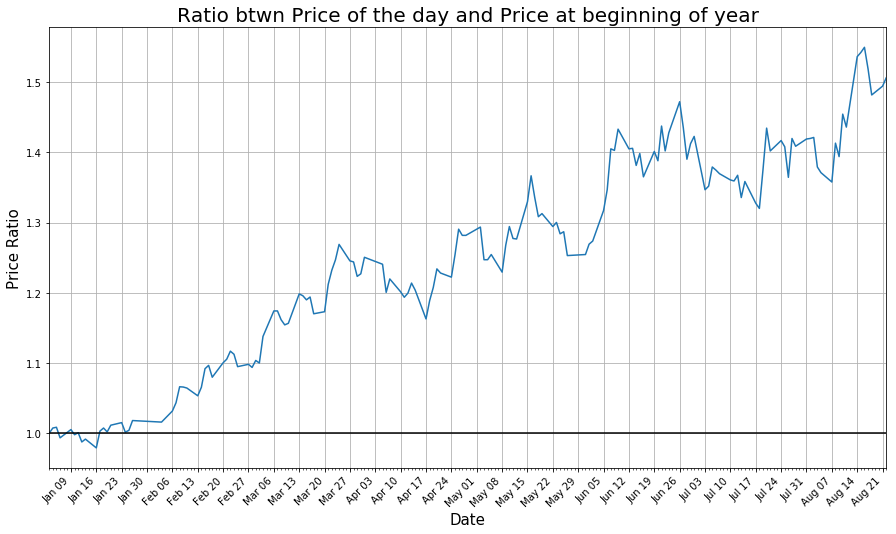

In [9]:
# Compare price for the day with price at beginning of year
stock_return = Df3.apply(lambda x: x / x[0])

# Set plot parameters
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
 
# Adjust plot characteristic parameters
ax.grid(True) 
ax.xaxis_date()
ax.autoscale_view()
ax.set_xlabel("Date", fontsize = 15)
ax.set_ylabel("Price Ratio", fontsize = 15)
ax.set_title("Ratio btwn Price of the day and Price at beginning of year", fontsize = 20)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.plot(stock_return)
plt.plot((stock_return.index[0],stock_return.index[-1]),(1,1), 'k-')
plt.xlim(stock_return.index[0],stock_return.index[-1])
plt.show()

### Plot Price Change Percent within Each Trading Day

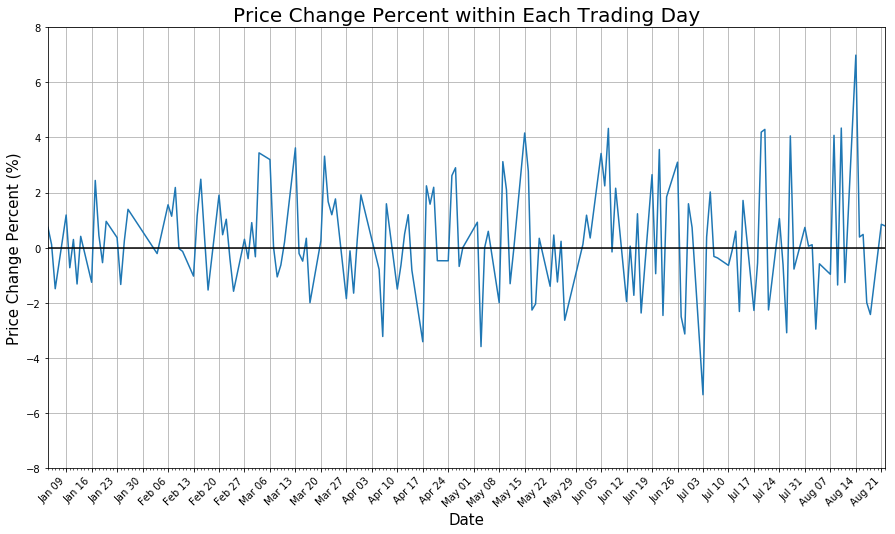

In [10]:
# Price change within a trading day, calculated by 
# [(closing_price)-(closing_price_a_day_ahead)]/(closing_price_a_day_ahead)
stock_change = Df3.apply(lambda x: np.multiply(np.divide(np.subtract(x, x.shift(1)), x.shift(1)),100)) # shift moves dates back by 1.
stock_change.columns  = ["Change"]

# Set plot parameters
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
 
# Adjust plot characteristic parameters
ax.grid(True) 
ax.xaxis_date()
ax.autoscale_view()
ax.set_xlabel("Date", fontsize = 15)
ax.set_ylabel("Price Change Percent (%)", fontsize = 15)
ax.set_title("Price Change Percent within Each Trading Day", fontsize = 20)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.plot(stock_change)
plt.plot((stock_change.index[0],stock_change.index[-1]), (0,0), 'k-')
plt.xlim(stock_change.index[1],stock_change.index[-1])
plt.ylim(-8,8)
plt.show()

### Plot 20-day Moving Average (important predictor for trend of stock)

/Users/yijingxiao/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


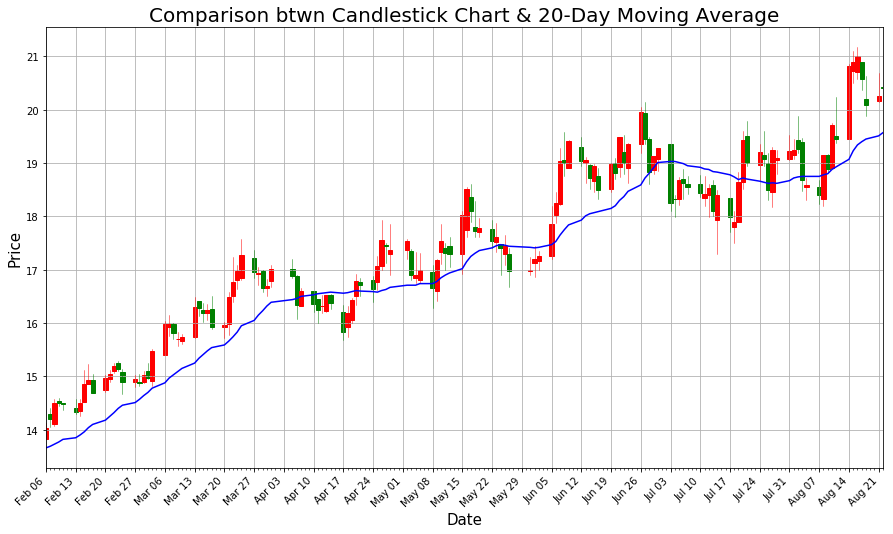

In [11]:
# Creat Dataframe with slicing by date from the first Dataframe
df4 = df1.loc['20170101':'20171231']

#Calculate 20-day Moving Average from closing price and attach to the original dataframe
df4["20d"] = np.round(df4['Close'].rolling(window = 20, center = False).mean(), 2)
df4 = df4.dropna()
 
# Create a new DataFrame which includes stock data for each day shown on each candle stick
plotdata = df4.loc[:,["Open", "High", "Low", "Close"]]

# Set plot parameters
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

 
# Create the candlestick chart, Gain shown in red, Loss shown in green
candlestick_ohlc(ax, list(zip(list(date2num(plotdata.index.tolist())), 
                plotdata["Open"].tolist(), plotdata["High"].tolist(),
                plotdata["Low"].tolist(), plotdata["Close"].tolist())),
                colorup = "red", colordown = "green", width = stick)

# Add moving averages lines to the Candlestick chart
df4.loc[:,"20d"].plot(ax = ax, color = "blue")

# Adjust plot characteristic parameters
ax.grid(True)
ax.xaxis_date()
ax.autoscale_view()
ax.set_xlabel("Date", fontsize = 15)
ax.set_ylabel("Price", fontsize = 15)
ax.set_title("Comparison btwn Candlestick Chart & 20-Day Moving Average", fontsize = 20)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()